In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv')
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/IT_customer_churn2.csv')

# Handle null values in the 'TotalCharges' column
# You can either drop the rows with null values or fill them with a specific value (e.g., mean or median)

# Option 1: Drop rows with null values in 'TotalCharges'
# data = data.dropna(subset=['TotalCharges'])

# Option 2: Fill null values with the mean
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

# Option 3: Fill null values with the median
# data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Save the updated DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/stroke/IT_customer_churn3.csv', index=False)

print("Null values handled and data saved successfully.")


Null values handled and data saved successfully.


In [3]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Display the encoded dataset
print(X)
print(y)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [5]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.7920511000709723
Precision: 0.6538461538461539
Recall: 0.45576407506702415
F1-score: 0.5371248025276462
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



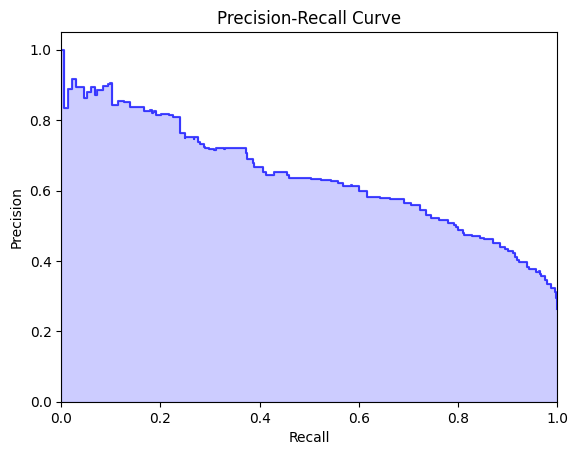

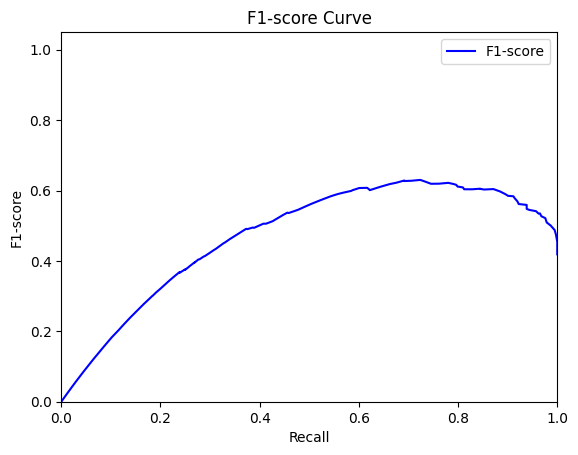

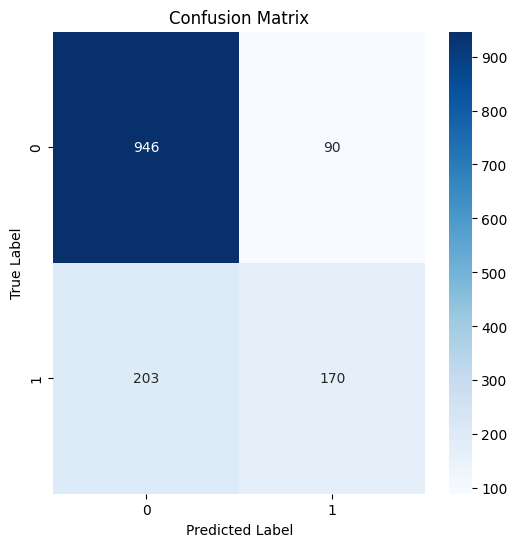

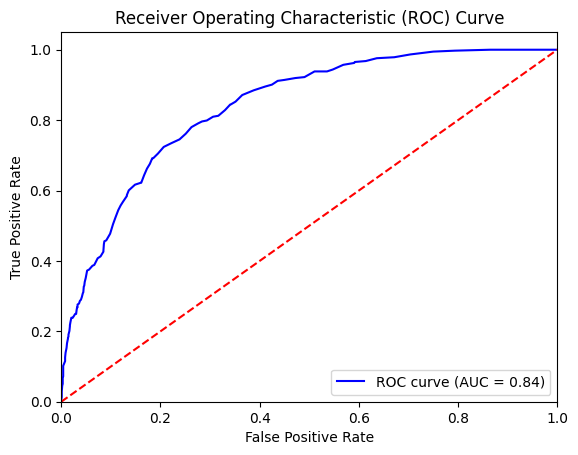

In [ ]:
# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



# Plot Precision-Recall curve
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()


# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8019872249822569
Precision: 0.6506410256410257
Recall: 0.5442359249329759
F1-score: 0.5927007299270073
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



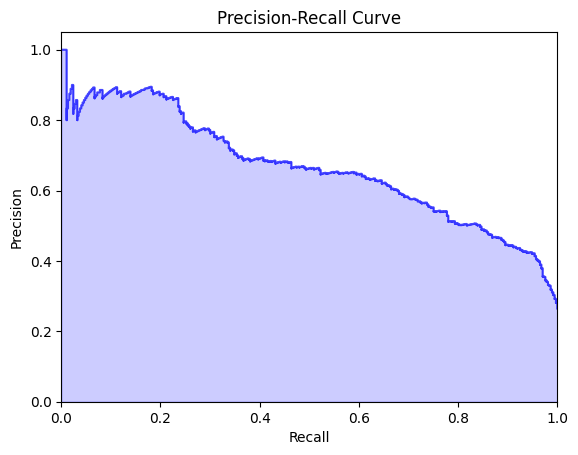

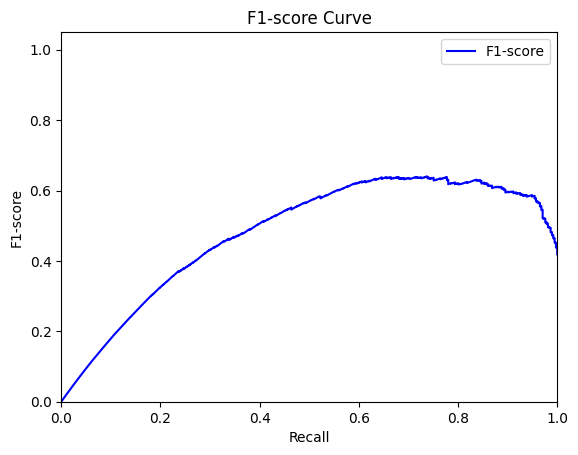

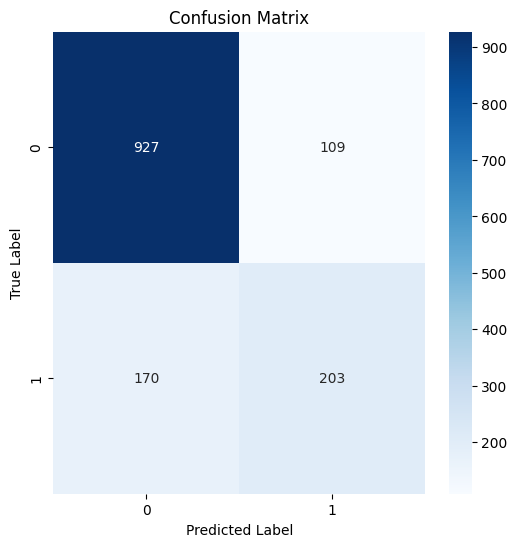

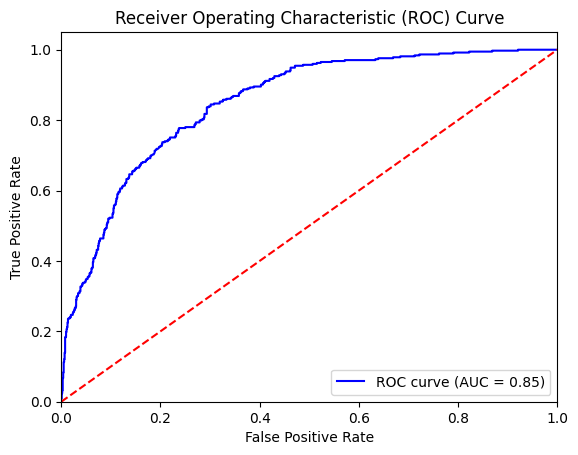

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier with hyperparameters
logistic_regression = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=42)  # Adjust parameters as needed

# Train the model
logistic_regression.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logistic_regression.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
# Import the necessary module for SVC
from sklearn.svm import SVC

# Initialize the SVC
svc_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Train the model
svc_classifier.fit(X_train, y_train)


SVC(random_state=42)

Accuracy: 0.6678495386799148
Precision: 0.41154562383612664
Recall: 0.5924932975871313
F1-score: 0.4857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1036
           1       0.41      0.59      0.49       373

    accuracy                           0.67      1409
   macro avg       0.62      0.64      0.62      1409
weighted avg       0.72      0.67      0.68      1409



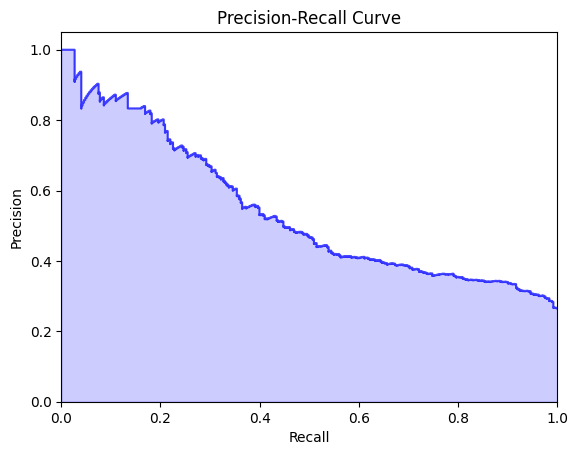

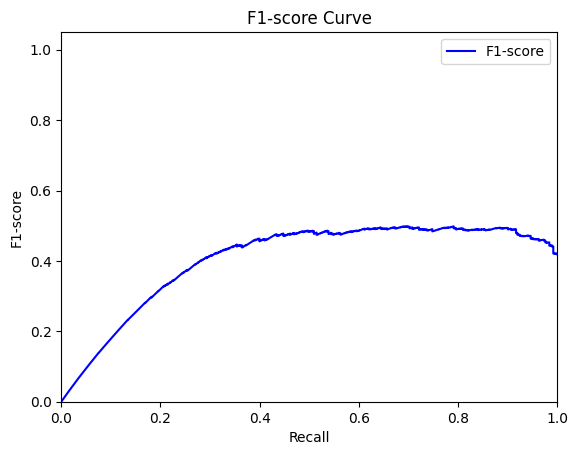

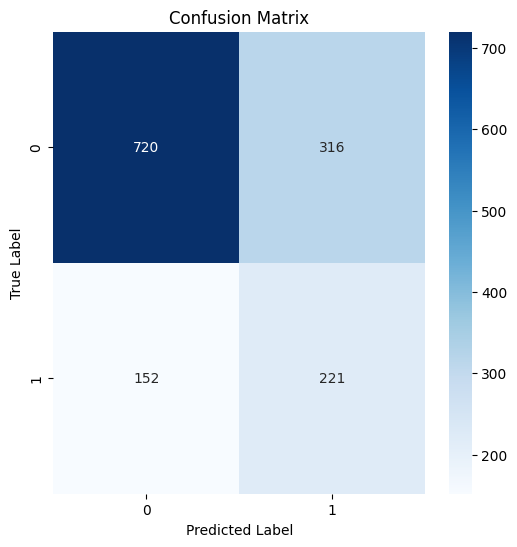

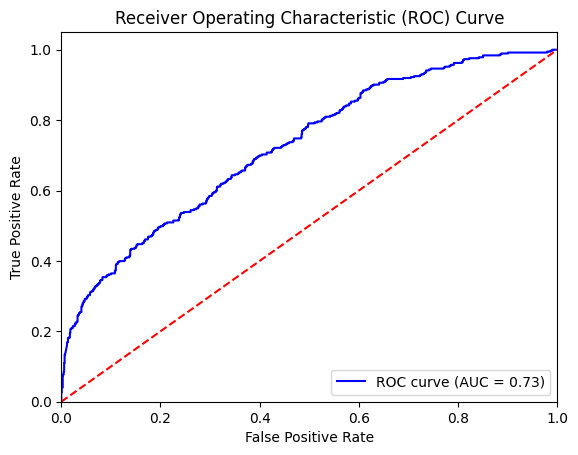

In [8]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust class weights in the SVC
svc_classifier = SVC(kernel='rbf', C=1.0, random_state=42, probability=True, class_weight='balanced')

# Train the model
svc_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
